<a href="https://colab.research.google.com/github/rafaelhendges/Doacaofacil/blob/main/Aula12_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

Carregando arquivo

In [ ]:
from google.colab import files

uploaded = files.upload('SAT_by_Year_Gender_1967_2001.csv')

In [7]:
df = pd.read_csv('SAT_by_Year_Gender_1967_2001.csv')


Limpeza e Preparação dos Dados

In [8]:
print(df.info())
print(df.isnull().sum())

# identificando dados ausentes
df.fillna(df.mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        35 non-null     int64
 1   M_verbal    35 non-null     int64
 2   F_verbal    35 non-null     int64
 3   M_math      35 non-null     int64
 4   F_math      35 non-null     int64
 5   A_verbal    35 non-null     int64
 6   A_math      35 non-null     int64
 7   M_averages  35 non-null     int64
 8   F_averages  35 non-null     int64
 9   A_averages  35 non-null     int64
dtypes: int64(10)
memory usage: 2.9 KB
None
Year          0
M_verbal      0
F_verbal      0
M_math        0
F_math        0
A_verbal      0
A_math        0
M_averages    0
F_averages    0
A_averages    0
dtype: int64


In [ ]:
Identificando as colunas

In [14]:
print(df.columns)

Index(['Year', 'M_verbal', 'F_verbal', 'M_math', 'F_math', 'A_verbal',
       'A_math', 'M_averages', 'F_averages', 'A_averages', 'Decade'],
      dtype='object')


Lindando dados para identificar as colunas

In [15]:
df['Decade'] = (df['Year'] // 10) * 10

media_decada = df.groupby('Decade')[['M_verbal', 'F_verbal', 'M_math', 'F_math']].mean().reset_index()

# Exibindo o resultado
print(media_decada)


   Decade  M_verbal    F_verbal  M_math      F_math
0    1960     539.0  543.666667   534.0  496.666667
1    1970     520.0  516.800000   522.7  482.800000
2    1980     510.5  499.500000   519.3  477.600000
3    1990     505.4  499.300000   525.3  488.700000
4    2000     508.0  503.000000   533.0  498.000000


Restruturação dos dados

<ipython-input-16-f5e28e255e2d>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=media_decada_melted, x='Decade', y='Score', hue='Gender', ci=None, palette="pastel")


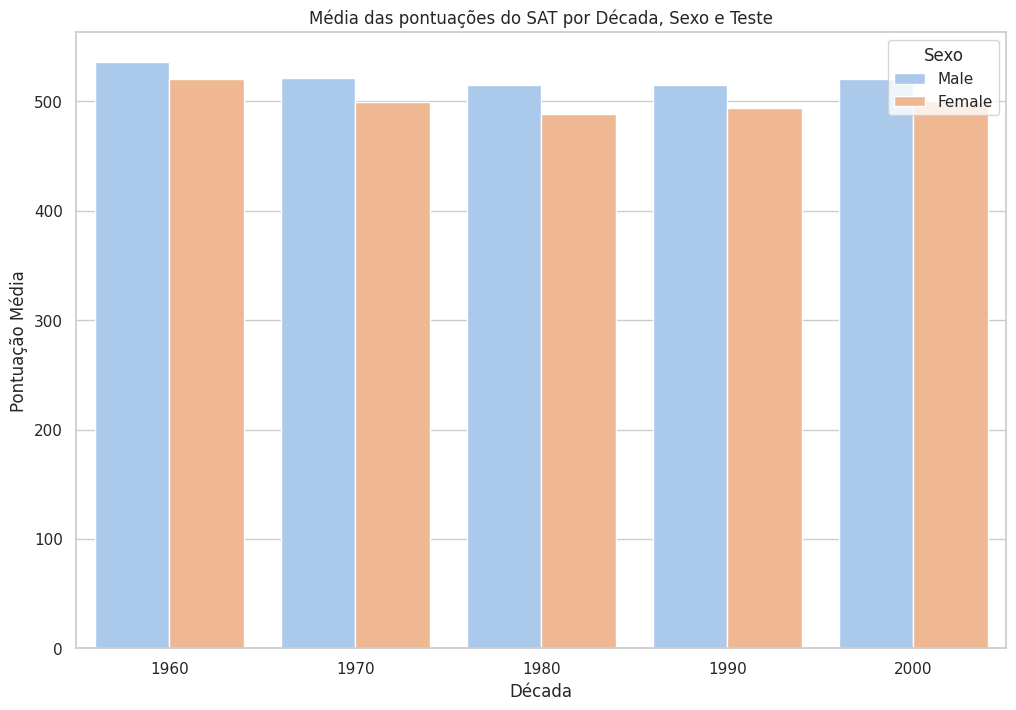

In [16]:
media_decada_melted = media_decada.melt(id_vars='Decade',
                                        value_vars=['M_verbal', 'F_verbal', 'M_math', 'F_math'],
                                        var_name='Gender_Test',
                                        value_name='Score')

media_decada_melted['Gender'] = media_decada_melted['Gender_Test'].str[0].map({'M': 'Male', 'F': 'Female'})
media_decada_melted['Test'] = media_decada_melted['Gender_Test'].str[2:]

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=media_decada_melted, x='Decade', y='Score', hue='Gender', ci=None, palette="pastel")
plt.title('Média das pontuações do SAT por Década, Sexo e Teste')
plt.xlabel('Década')
plt.ylabel('Pontuação Média')
plt.legend(title='Sexo')
plt.show()


Tabela de dados para tempo

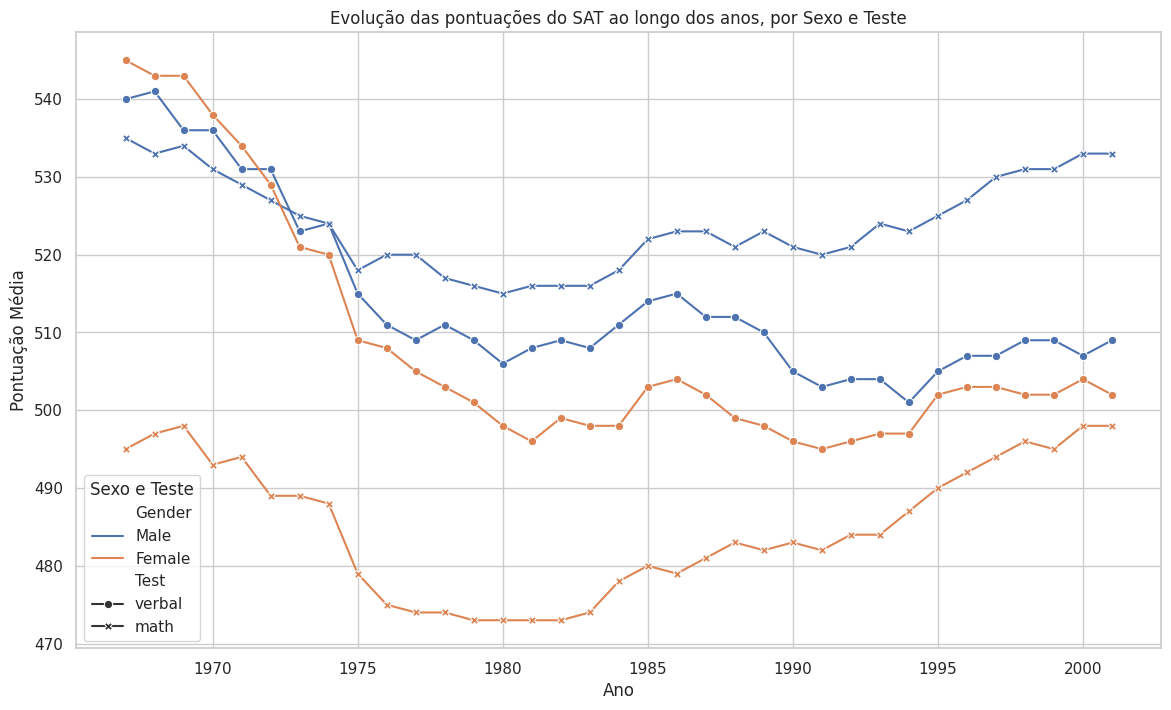

In [17]:
df_melted = df.melt(id_vars='Year',
                    value_vars=['M_verbal', 'F_verbal', 'M_math', 'F_math'],
                    var_name='Gender_Test',
                    value_name='Score')

# Separando as informações de gênero e tipo de teste
df_melted['Gender'] = df_melted['Gender_Test'].str[0].map({'M': 'Male', 'F': 'Female'})
df_melted['Test'] = df_melted['Gender_Test'].str[2:]

# Gráfico de linhas
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x='Year', y='Score', hue='Gender', style='Test', markers=True, dashes=False)
plt.title('Evolução das pontuações do SAT ao longo dos anos, por Sexo e Teste')
plt.xlabel('Ano')
plt.ylabel('Pontuação Média')
plt.legend(title='Sexo e Teste')
plt.show()


Verificação de outliers

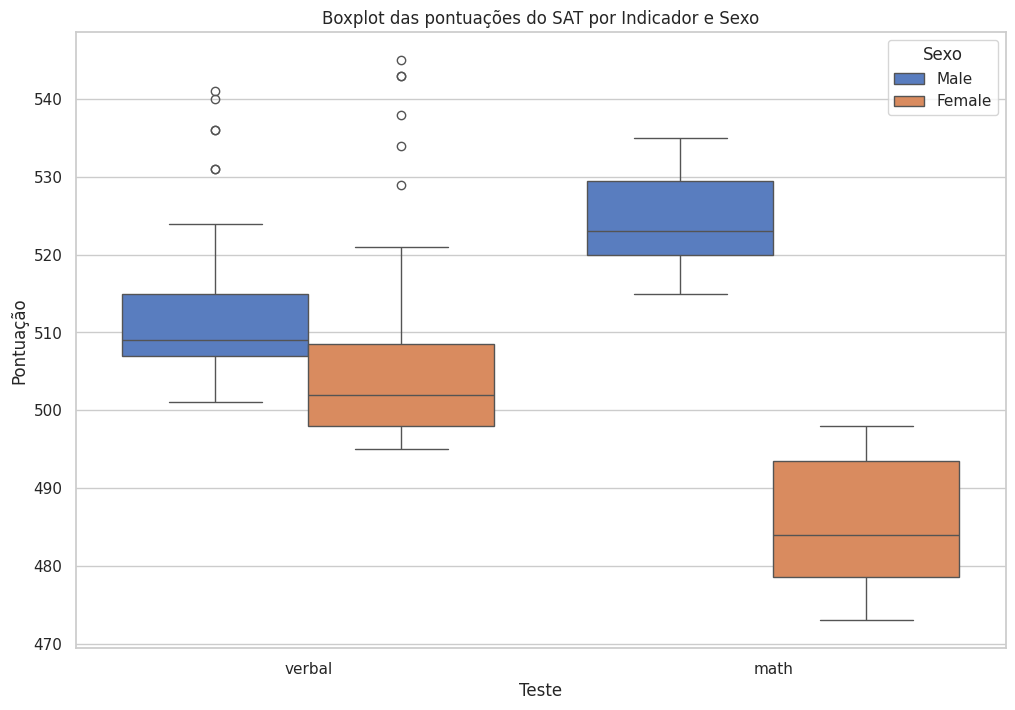

In [18]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='Test', y='Score', hue='Gender', palette="muted")
plt.title('Boxplot das pontuações do SAT por Indicador e Sexo')
plt.xlabel('Teste')
plt.ylabel('Pontuação')
plt.legend(title='Sexo')
plt.show()
